In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,SelectKBest

In [2]:
columns_names=['symboling','normalized_losses','make','fuel_type','aspiration',
               'num_of_doors','body_style','drive_wheels','engine_location','wheel_base',
               'length','width','height','curb_weight','engine_type','num_cylinders',
               'engine_size','fuel_system','bore','stroke','compression_ratio','horsepower',
               'peak_rpm','city_mpg','highway_mpg','price']

In [3]:
df=pd.read_csv('original/imports-85.data.csv')

In [4]:
df.columns=columns_names

In [5]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
df=df.replace('?',np.NaN)

In [7]:
df.shape

(204, 26)

In [8]:
df.isnull().sum()

symboling             0
normalized_losses    40
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized_losses    164 non-null object
make                 204 non-null object
fuel_type            204 non-null object
aspiration           204 non-null object
num_of_doors         202 non-null object
body_style           204 non-null object
drive_wheels         204 non-null object
engine_location      204 non-null object
wheel_base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb_weight          204 non-null int64
engine_type          204 non-null object
num_cylinders        204 non-null object
engine_size          204 non-null int64
fuel_system          204 non-null object
bore                 200 non-null object
stroke               200 non-null object
compression_ratio    204 non-null float64
horsepower           202 non-nul

In [10]:
df[['price','peak_rpm','horsepower','stroke','bore','normalized_losses']]=df[['price','peak_rpm','horsepower','stroke','bore','normalized_losses']].astype('float')

In [11]:
df=df.dropna(how='any')

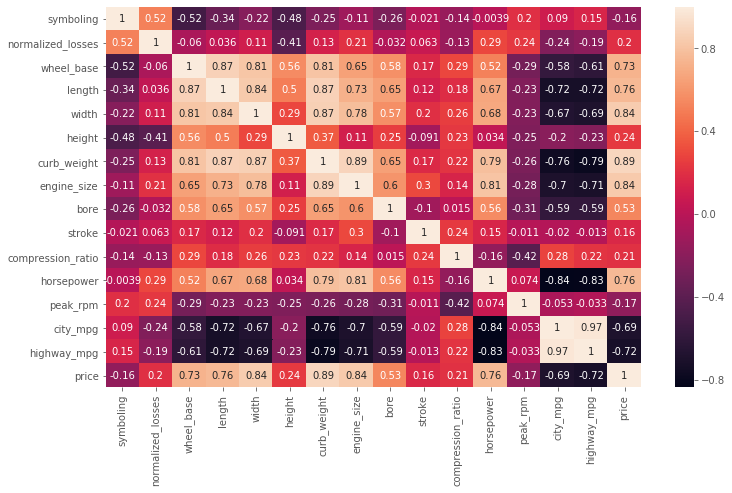

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
corr=df.corr()

In [14]:
cols_to_drop=corr[corr['price']<0.5].price.index.tolist()

In [15]:
cols_to_drop

['symboling',
 'normalized_losses',
 'height',
 'stroke',
 'compression_ratio',
 'peak_rpm',
 'city_mpg',
 'highway_mpg']

In [16]:
df=df.drop(cols_to_drop,axis=1) 

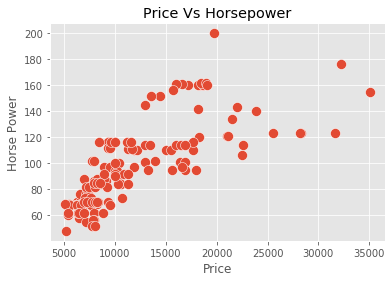

In [17]:
plt.scatter(x=df['price'],y=df['horsepower'],edgecolors='white',s=100)
plt.ylabel('Horse Power')
plt.xlabel('Price')
plt.title('Price Vs Horsepower')
plt.show()

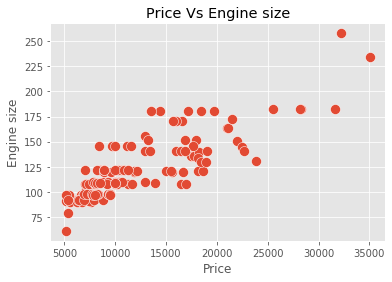

In [18]:
plt.scatter(x=df['price'],y=df['engine_size'],edgecolors='white',s=100)
plt.ylabel('Engine size')
plt.xlabel('Price')
plt.title('Price Vs Engine size')
plt.show()

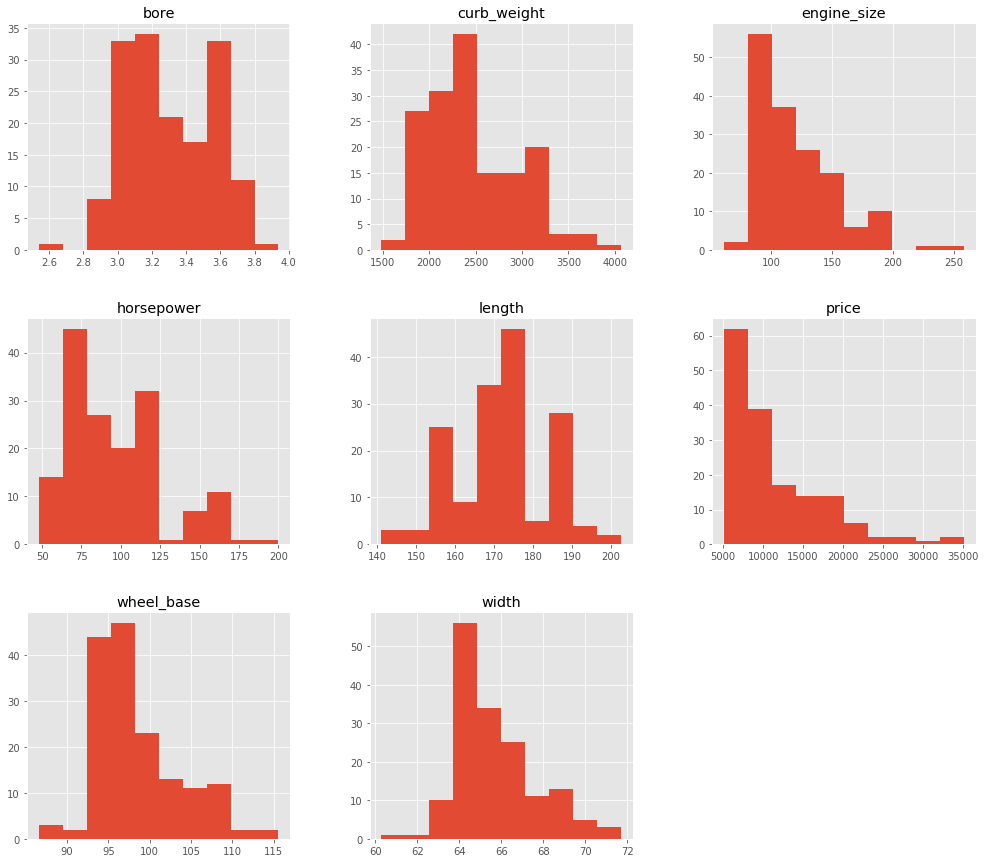

In [19]:
df.hist(figsize=(17,15))
plt.show()

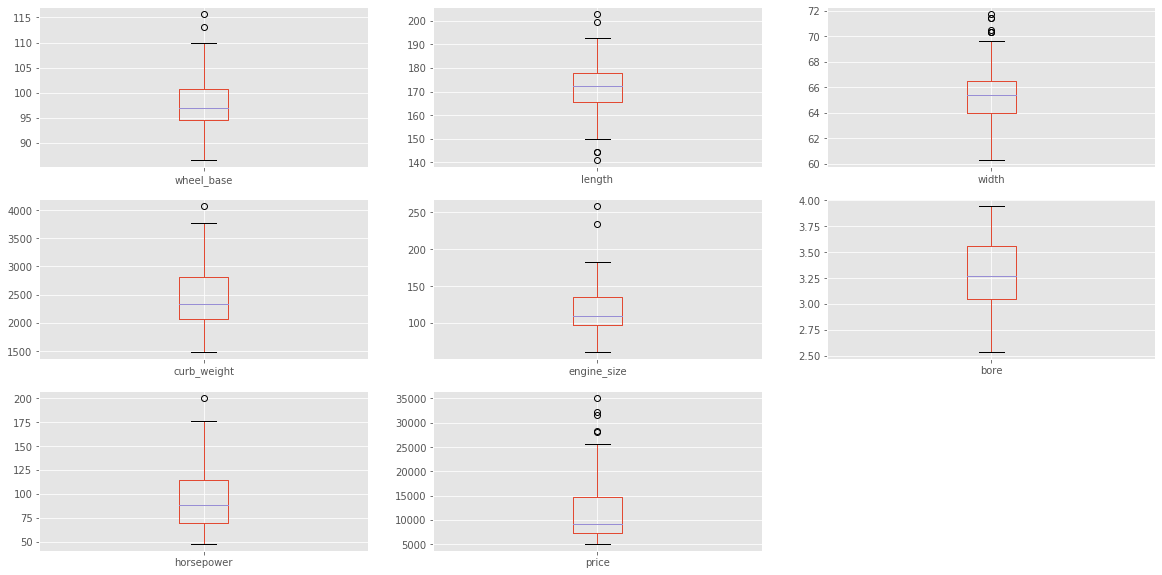

In [20]:
df.plot(kind='box',subplots=True,figsize=(20,10),grid=True,layout=(3,3))
plt.show()

In [21]:
low = .05
high = .95

In [22]:
quant_df=df['price'].quantile([low,high])

In [23]:
len(df[(df['price'] > quant_df.loc[low])& 
         (df['price'] < quant_df.loc[high])])

142

In [24]:
df=df[(df['price'] > quant_df.loc[low])& 
         (df['price'] < quant_df.loc[high])]

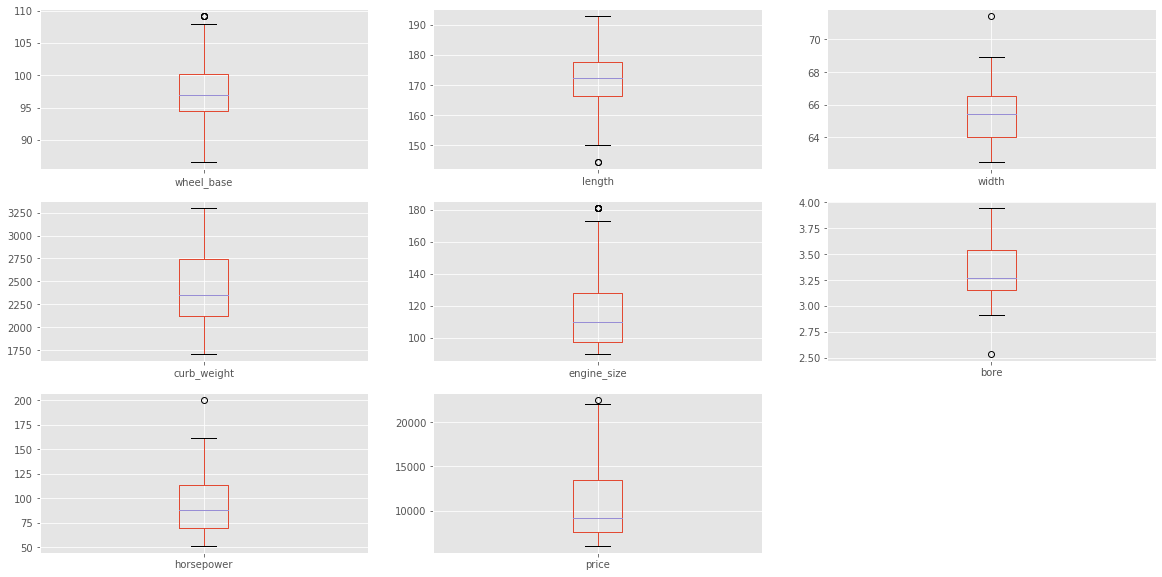

In [25]:
df.plot(kind='box',subplots=True,figsize=(20,10),grid=True,layout=(3,3))
plt.show()

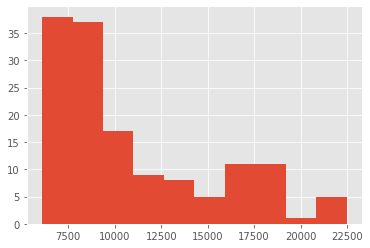

In [26]:
df['price'].hist(bins=10)

In [27]:
df.price.describe()

count      142.000000
mean     10874.971831
std       4328.578379
min       6095.000000
25%       7609.000000
50%       9245.500000
75%      13478.000000
max      22470.000000
Name: price, dtype: float64

In [28]:
categorical_data=df.select_dtypes(include='object').columns.tolist()
numerical_data=df.select_dtypes(include=['int64','float']).columns.tolist()

In [29]:
numerical_data=['wheel_base',
 'length',
 'width',
 'curb_weight',
 'engine_size',
 'bore',
 'horsepower']

In [30]:
df[categorical_data]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
9,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
10,bmw,gas,std,four,sedan,rwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...
198,volvo,gas,turbo,four,wagon,rwd,front,ohc,four,mpfi
199,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
200,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi


In [31]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

In [32]:
categorical_transformer = Pipeline(steps=[
    ('Onehot', OneHotEncoder(handle_unknown='ignore'))])

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_data),
        ('cat', categorical_transformer, categorical_data)])

In [34]:
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

In [35]:
X=df.drop('price',axis=1)
y=df.price

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
reg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['wheel_base', 'length',
                                                   'width', 'curb_weight',
                                       

In [38]:
y_predict=reg.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [40]:
mean_squared_error(y_test,y_predict)

2461827.222343971

In [41]:
mean_absolute_error(y_test,y_predict)

1157.2616981069357

In [42]:
r2_score(y_test,y_predict)*100

84.29272845125824